# VER 2: 
**CHANGE LOG**

* change model to detection model
* 

In [7]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html


In [8]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
print(torchvision.__version__)
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

1.9.0+cu111 True
0.10.0+cu111


In [9]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# plt.figure(figsize = (20,20), dpi = 100)


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

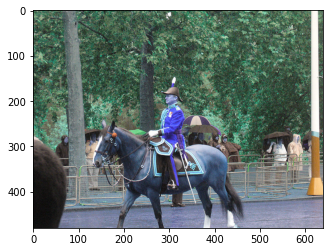

In [10]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(im)

In [11]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_68d202.pkl: 663MB [01:03, 10.4MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.0


In [12]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0, 25,  0,  0, 25, 25,  0,  0,  0,  0, 25,  0],
       device='cuda:0')
Boxes(tensor([[132.9278, 246.6379, 463.5482, 480.0000],
        [258.6244, 161.5468, 337.1576, 407.7436],
        [  0.0000, 278.5832,  75.1529, 475.5381],
        [114.0343, 265.1960, 150.4847, 396.5887],
        [ 48.2085, 275.0251,  79.8162, 345.1213],
        [561.0758, 273.3667, 595.5221, 367.1072],
        [509.0049, 265.2365, 573.1155, 292.7913],
        [384.6914, 272.1828, 412.1364, 307.3944],
        [526.7502, 280.6893, 562.1566, 348.1790],
        [331.5553, 230.0806, 393.5180, 256.6008],
        [338.0782, 252.1636, 414.9969, 280.6153],
        [507.3170, 282.9673, 533.8842, 347.8902],
        [345.3246, 269.7372, 384.5261, 298.9379],
        [407.5568, 273.3968, 454.9272, 341.6323],
        [594.8682, 263.4063, 613.6784, 314.7442],
        [374.8466, 252.5861, 414.1368, 277.7503],
        [552.7322, 257.5269, 572.4736, 306.0464]], device='cuda:0'))


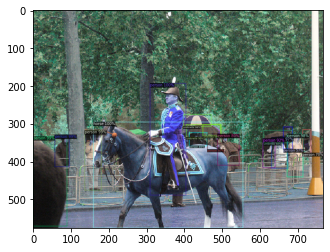

In [13]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])

## 2. Evaluation on the Test dataset

In [16]:
# from detectron2.data.datasets import register_coco_instanes
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# 
cfg.DATASETS.TEST = ("")
evaluator = COCOEvaluator("coco2017_val",("bbox","category_id"), False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "coco2017_val")

inference_on_dataset(predictor.model, val_loader, evaluator)

WARNING [10/16 20:11:50 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/16 20:11:50 d2.evaluation.coco_evaluation]: 'coco2017_val' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[10/16 20:11:50 d2.data.datasets.coco]: Converting annotations of dataset 'coco2017_val' to COCO format ...)


KeyError: "Dataset 'coco2017_val' is not registered! Available datasets are: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_minival_100, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2014_minival_100, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fine_sem_seg_val, cityscapes_fine_instance_seg_test, cityscapes_fine_sem_seg_test, cityscapes_fine_panoptic_train, cityscapes_fine_panoptic_val, voc_2007_trainval, voc_2007_train, voc_2007_val, voc_2007_test, voc_2012_trainval, voc_2012_train, voc_2012_val, ade20k_sem_seg_train, ade20k_sem_seg_val"